# Tutorial 3

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy
path = "../src/"

## Task 1 Student Dataset

In [4]:
stud_perf = pd.read_csv(path + "data/student/student-mat.csv", sep=';')
stud_perf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Task 1.1

In [8]:
column_to_use = ['G1', 'G2', 'G3']
stud_perf[column_to_use].corr().style.background_gradient(cmap='coolwarm_r')

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


### Task 1.2

In [15]:
grade_type = pd.Series(np.repeat(['first', 'second', 'third'], repeats=395))
grade_score = pd.Series(stud_perf.G1.to_list() 
                        + stud_perf.G2.to_list() 
                        + stud_perf.G3.to_list())
pd.DataFrame({'grade_type': grade_type, 'grade_score': grade_score})

,grade_type,grade_score
0,first,5
1,first,5
2,first,7
3,first,15
4,first,6
...,...,...
1180,third,9
1181,third,16
1182,third,7
1183,third,10


### Task 1.3

array([[<Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

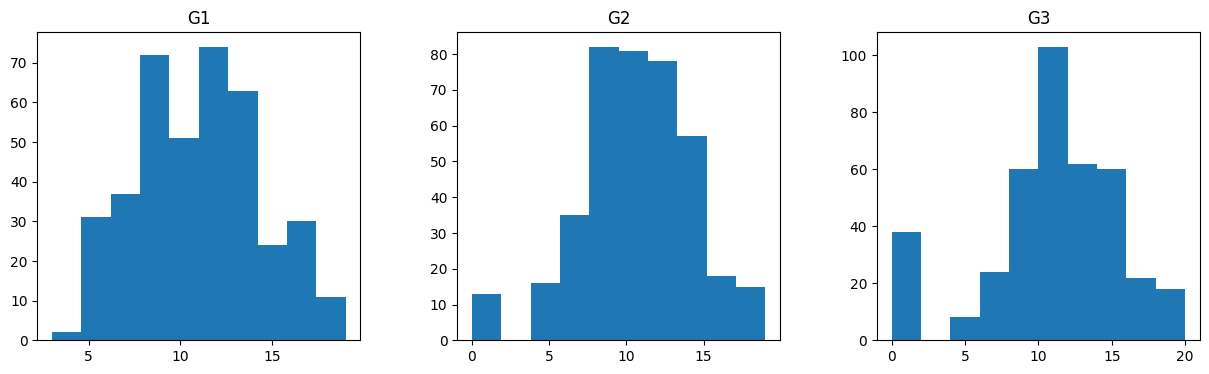

In [24]:
stud_perf[['G1', 'G2', 'G3']].hist(layout=(1,3), figsize=(15,4), grid=False)

### Task 1.4

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9


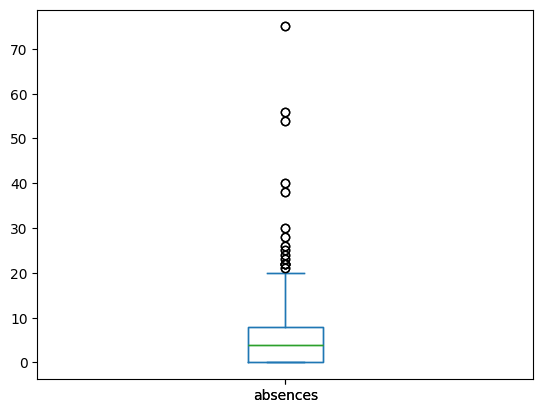

In [ ]:
stud_perf.plot.box(column='absences')
stud_perf.absences.plot(kind='box')
stud_perf.absences.describe()
iqr = stats.iqr(stud_perf.absences)
upper = np.quantile(stud_perf.absences, 0.75)
lower = np.quantile(stud_perf.absences, 0.25)
stud_perf[stud_perf.absences > upper + 1.5 * iqr]

In [62]:
def getOutlier(data, var):
    iqr = stats.iqr(data[var])
    upper = np.quantile(data[var], 0.75)
    lower = np.quantile(data[var], 0.25)
    return data[(data[var] > upper + 1.5 * iqr) | (data[var] < lower - 1.5 * iqr)]
    

In [63]:
getOutlier(stud_perf, 'absences')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9


## Task 2 "Poisson-ness"

Another way: $(k+1)[\frac{P(Y=k+1)}{P(Y=k)}] = \lambda$ 

### Task 2.1

In [66]:
er = pd.read_csv(path + "data/er_arrivals.csv")
er

,date,num_arrivals
0,1963-02-04,2
1,1963-02-08,1
2,1963-02-11,1
3,1963-02-16,1
4,1963-02-18,2
...,...,...
420,1964-03-27,0
421,1964-03-28,0
422,1964-03-29,0
423,1964-03-30,0


### Task 2.2

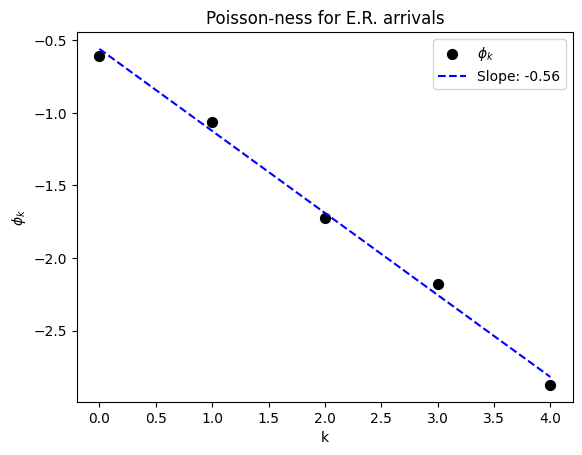

In [99]:
N = len(er.num_arrivals)
Xk = er.num_arrivals.value_counts()
k = Xk.index.to_numpy()
Xk = Xk.to_numpy()
phi = scipy.special.gammaln(k + 1) + np.log(Xk / N)

slope, intercept, _, _, _ = scipy.stats.linregress(k, phi)

lam_hat = np.exp(slope)
# Step 4: Plotting
plt.scatter(k, phi, label=r'$\phi_k$', color='black', s=50)
plt.plot(k, slope * k + intercept, linestyle='--', color='blue', label=f"Slope: {slope:.2f}")
plt.xlabel('k')
plt.ylabel(r'$\phi_k$')
plt.title("Poisson-ness for E.R. arrivals")
plt.legend()

### Task 2.3.1

In [102]:
lam_hat_mean = er.num_arrivals.mean()
lam_hat_slope = lam_hat
print(lam_hat_mean, lam_hat_slope)

0.5905882352941176 0.5684761417891122
